Nom 1: Eric Escrich

Nom 2:Adrià Vilariño

# Repte 5: Gat o gos?

<table>
<td>


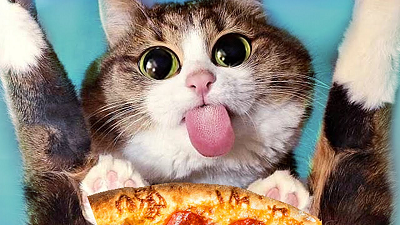



</td>
<td>


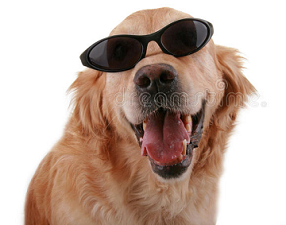



</td>
</table>

## Enunciat

En aquest repte crearem una **Xarxa Neuronal Convolucional** capaç de dir si una imatge correspon a la d'un gat o a la d'un gos.
Per poder fer això disposem d'un dataset format per 2000 fotos de gats i 2000 fotos de gossos. Aquest dataset es troba en [aquesta url](https://drive.google.com/file/d/1akESKTtn26-jiZGwMF1sVlDOMn8uQACu/view?usp=sharing).

### Pregunta 1
De quin tipus de problema es tracta?

Classificació binària pq hem de classificar cada imatge en una de dues categories: gat o gos.

In [1]:
# Descarrega el dataset. Aquest fitxer és un zip que pots descomprimir amb la llibreria zipfile
!pip install gdown --quiet

import gdown
import zipfile
import os

url = "https://drive.google.com/uc?id=1akESKTtn26-jiZGwMF1sVlDOMn8uQACu"
output = "cats_and_dogs.zip"

gdown.download(url, output, quiet=False)

extract_path = "cats_and_dogs_dataset"

with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

Downloading...
From (original): https://drive.google.com/uc?id=1akESKTtn26-jiZGwMF1sVlDOMn8uQACu
From (redirected): https://drive.google.com/uc?id=1akESKTtn26-jiZGwMF1sVlDOMn8uQACu&confirm=t&uuid=98c5dc1b-a280-4c9b-9ecb-64d027f26e5b
To: /content/cats_and_dogs.zip
100%|██████████| 91.0M/91.0M [00:03<00:00, 25.5MB/s]


In [2]:
# Defineix les variables train_dir, validation_dir, test_dir amb el path de
# cada un dels directoris que contenen les imatges corresponents
import os

# Defineix el directori base del dataset
base_dir = "cats_and_dogs_dataset/cats_and_dogs_small"

# Defineix els directoris d'entrenament, validació i test
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")
test_dir = os.path.join(base_dir, "test")

# Comprovem els valors
print("Directori d'entrenament:", train_dir)
print("Directori de validació:", validation_dir)
print("Directori de test:", test_dir)


Directori d'entrenament: cats_and_dogs_dataset/cats_and_dogs_small/train
Directori de validació: cats_and_dogs_dataset/cats_and_dogs_small/validation
Directori de test: cats_and_dogs_dataset/cats_and_dogs_small/test


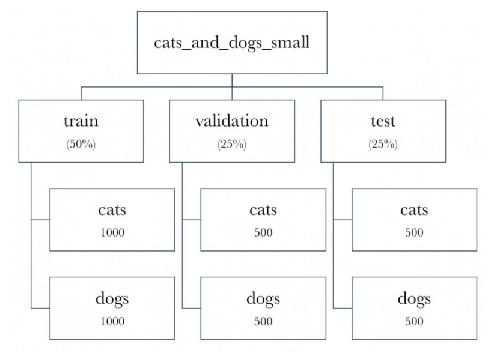

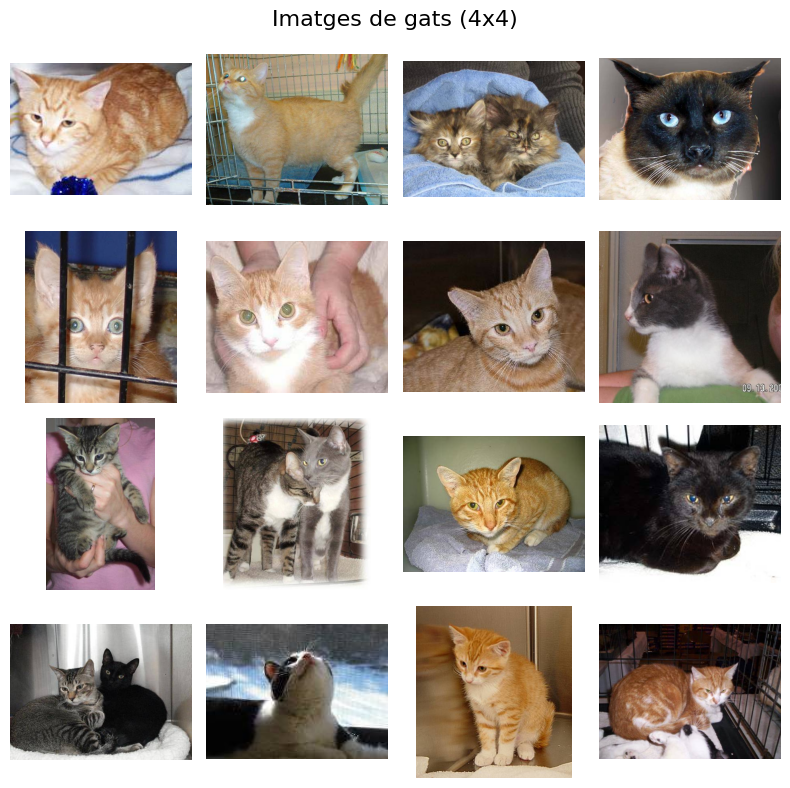

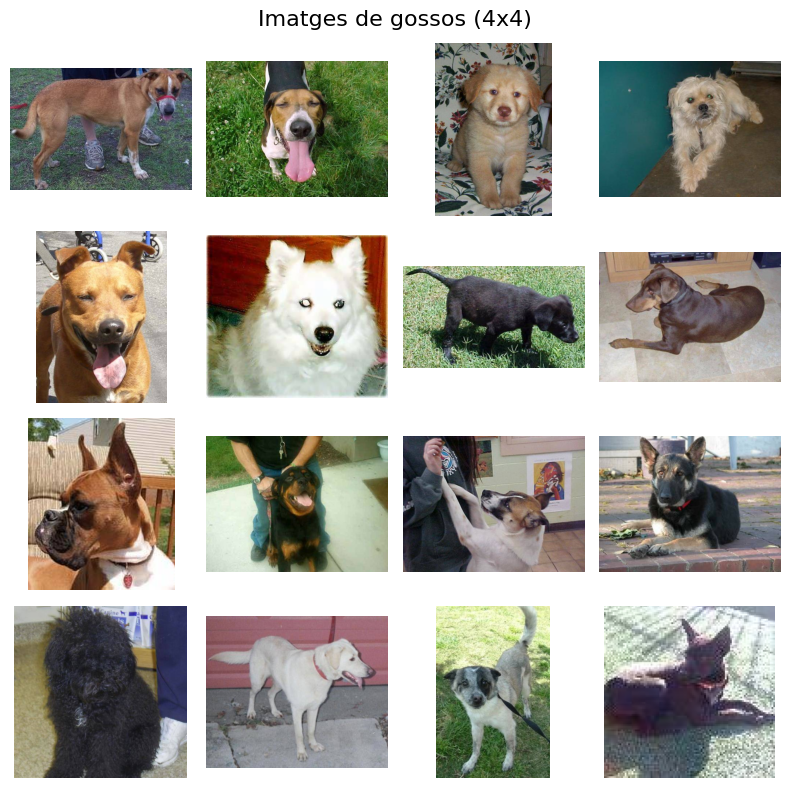

In [3]:
# Mostra les imatges de 16 gats i 16 gossos en matrius de 4x4
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Directori de gats i gossos (entrenament)
cats_dir = os.path.join(train_dir, "cats")
dogs_dir = os.path.join(train_dir, "dogs")

# Obtenim les llistes de fitxers d'imatges
cats_images = os.listdir(cats_dir)[:16]  # Seleccionem les 16 primeres imatges
dogs_images = os.listdir(dogs_dir)[:16]  # Seleccionem les 16 primeres imatges

# Crear una figura per mostrar gats
plt.figure(figsize=(8, 8))  # Figura de 8x8 polzades per als gats
for i in range(16):
    img_path = os.path.join(cats_dir, cats_images[i])  # Path de la imatge
    img = mpimg.imread(img_path)  # Llegim la imatge
    plt.subplot(4, 4, i + 1)  # Subgràfic a la posició i+1
    plt.imshow(img)  # Mostrem la imatge
    plt.axis("off")  # Ocultem els eixos
plt.suptitle("Imatges de gats (4x4)", fontsize=16)  # Títol de la figura
plt.tight_layout()
plt.show()

# Crear una figura per mostrar gossos
plt.figure(figsize=(8, 8))  # Figura de 8x8 polzades per als gossos
for i in range(16):
    img_path = os.path.join(dogs_dir, dogs_images[i])  # Path de la imatge
    img = mpimg.imread(img_path)  # Llegim la imatge
    plt.subplot(4, 4, i + 1)  # Subgràfic a la posició i+1
    plt.imshow(img)  # Mostrem la imatge
    plt.axis("off")  # Ocultem els eixos
plt.suptitle("Imatges de gossos (4x4)", fontsize=16)  # Títol de la figura
plt.tight_layout()
plt.show()



### Pregunta 2
Quàntes neurones tindrem a la capa de sortida?

Només 1 neurona amb una funció d'activació sigmoide, que produeix una sortida entre 0 i 1

In [4]:
# Degut a la complexitat del problema i a la mida de les imatges necessitarem una xarxa amb més capes. Això ens
# serveix per augmentar la capacitat del model i per reduïr encara més la mida del mapa de característiques abans
# d'arribar a la capa final.

# Crea una xarxa neuronal amb 4 capes convolucionals + MaxPooling de 32, 64, 128 i 128 filtres respectivament i
# de mida 3x3 (Conv) i 2x2 (MaxP). Abans de la capa de sortida tindrem una capa densa de 512 neurones. L'entrada
# al nostre model serà de 150x150x3, farem servir imatges a color de 150x150 pixels i cada pixel necessita 3 números
# per poder codificar la profunditat de color en RGB.

# Observa amb el mètode summary com els mapes de característiques van reduïnt la seva mida a mesura que avancen
# al llarg de les capes de la xarxa neuronal.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import RMSprop

# Definim el model seqüencial
model = Sequential()

# Primera capa convolucional amb 32 filtres de mida 3x3, activació ReLU i padding 'same'
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)))
# Primera capa de MaxPooling amb finestres de 2x2
model.add(MaxPooling2D((2, 2)))

# Segona capa convolucional amb 64 filtres de mida 3x3, activació ReLU i padding 'same'
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
# Segona capa de MaxPooling amb finestres de 2x2
model.add(MaxPooling2D((2, 2)))

# Tercera capa convolucional amb 128 filtres de mida 3x3, activació ReLU i padding 'same'
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
# Tercera capa de MaxPooling amb finestres de 2x2
model.add(MaxPooling2D((2, 2)))

# Quarta capa convolucional amb 128 filtres de mida 3x3, activació ReLU i padding 'same'
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
# Quarta capa de MaxPooling amb finestres de 2x2
model.add(MaxPooling2D((2, 2)))

# Aplanem els mapes de característiques per connectar-los a les capes denses
model.add(Flatten())

# Capa densa amb 512 neurones i activació ReLU
model.add(Dense(512, activation='relu'))

# Capa de sortida amb 1 neurona i activació sigmoide per a classificació binària
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compil·la el model amb un optimitzador RMSprop amb un learning rate de 0,0001
model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Mostrem el resum del model per veure la reducció de la mida dels mapes de característiques
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 10368)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       5,308,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,550,273 (21.17 MB)

 Trainable params: 5,550,273 (21.17 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# El dataset són imatges de diferents mides i amb pixels RGB compresos entre 0 i 255. Per poder
# realitzar l'entrenament necessitem imatges de 150x150 pixels i amb els valors RGB normalitzats
# entre 0 i 1.

# Pots realitzar aquesta operació fent servir ImageDataGenerator i aprofitar la jerarquia de directoris
# per definir la classe de cada una de les imatges.

# Exemple:

# train_datagen = ImageDataGenerator( rescale = 1.0/255. )
# train_generator = train_datagen.flow_from_directory(train_dir,
#                                                     batch_size=20,
#                                                     class_mode='binary',
#                                                     target_size=(150, 150))

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

# Definim els generadors per a les dades d'entrenament i validació
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Creem els generadors de lots d'imatges a partir dels directoris
train_generator = train_datagen.flow_from_directory(
    train_dir,                # Directori amb les imatges d'entrenament
    target_size=(150, 150),   # Redimensionem les imatges a 150x150 píxels
    batch_size=20,
    class_mode='binary'       # Com que és una classificació binària
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,           # Directori amb les imatges de validació
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
# Realitza l'entrenament del model incolent les dades de validació, amb 50 epochs i iguala la sortida a la variable "history"
# Compilem el model amb l'optimitzador RMSprop i un learning rate de 0.0001
model.compile(
    optimizer=RMSprop(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Entrenem el model durant 50 èpoques
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 97ms/step - accuracy: 0.5166 - loss: 0.6979 - val_accuracy: 0.6030 - val_loss: 0.6814
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/50


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.5954 - loss: 0.6749 - val_accuracy: 0.5900 - val_loss: 0.6544
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.6614 - loss: 0.6305 - val_accuracy: 0.6810 - val_loss: 0.6097
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 169us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.7112 - loss: 0.5727 - val_accuracy: 0.6780 - val_loss: 0.5946
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.7350 - loss: 0.5578 - val_accuracy: 0.6890 - val_loss: 0.5959
Epoch 10/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.7443 - loss: 0.5152 - val_accuracy: 0.6980 - v

### Pregunta 3
Quina és la precisió amb les dades d'entrenament? I amb les dades de validació?

Una diferència gran entre aquestes dues precisions ens podria estar indicant que s'ha produït sobreentrenament (overfitting).

Resultats de precisió:

*   Precisió en les dades d'entrenament: La precisió final del conjunt d'entrenament al final de l'entrenament és de 81.25%.
*   Precisió en les dades de validació: La precisió final del conjunt de validació al final de l'entrenament és de 62.50%.



Anàlisi de sobreentrenament:

*   La diferència entre la precisió de les dades d'entrenament (81.25%) i la precisió de les dades de validació (62.50%) podria ser un indici de sobreentrenament (overfitting). A mesura que el model continua entrenant-se, sembla que està aprenent a memoritzar les dades d'entrenament però no generalitza bé a les dades de validació. Això es fa evident perquè, mentre la precisió d'entrenament millora, la precisió de validació es manté constant o no millora tan significativament.




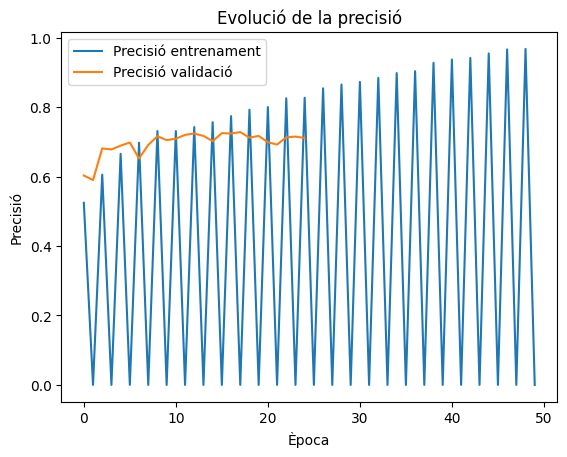

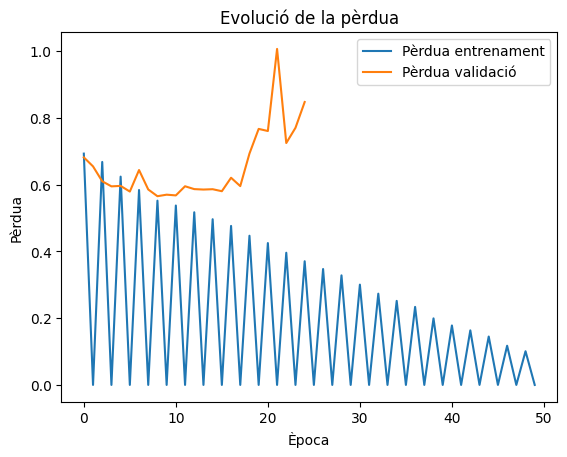

In [8]:
# Fent servir la variable history, mostra un gràfic amb l'evolució de precisió i l'error
# de les dades d'entrenament i les dades de validació
import matplotlib.pyplot as plt

# Gràfic de la precisió durant l'entrenament i la validació
plt.plot(history.history['accuracy'], label='Precisió entrenament')
plt.plot(history.history['val_accuracy'], label='Precisió validació')
plt.title('Evolució de la precisió')
plt.xlabel('Època')
plt.ylabel('Precisió')
plt.legend()
plt.show()

# Gràfic de la pèrdua durant l'entrenament i la validació
plt.plot(history.history['loss'], label='Pèrdua entrenament')
plt.plot(history.history['val_loss'], label='Pèrdua validació')
plt.title('Evolució de la pèrdua')
plt.xlabel('Època')
plt.ylabel('Pèrdua')
plt.legend()
plt.show()

In [9]:
# Precisió i pèrdua en l'última època
precisio_entrenament = history.history['accuracy'][-1]
precisio_validacio = history.history['val_accuracy'][-1]
perdua_entrenament = history.history['loss'][-1]
perdua_validacio = history.history['val_loss'][-1]

print(f"Precisió en les dades d'entrenament: {precisio_entrenament:.2f}")
print(f"Precisió en les dades de validació: {precisio_validacio:.2f}")
print(f"Pèrdua en les dades d'entrenament: {perdua_entrenament:.2f}")
print(f"Pèrdua en les dades de validació: {perdua_validacio:.2f}")

Precisió en les dades d'entrenament: 0.00
Precisió en les dades de validació: 0.71
Pèrdua en les dades d'entrenament: 0.00
Pèrdua en les dades de validació: 0.85


A les gràfiques podem veure com les linies de la precisió de les dades d'entrenament i de validació es separen aproximadament a partir de l'epoch 5. A la gràfica de l'error, podem observar que mentre amb les dades d'entrenament l'error continua baixant, amb les dades de validació l'error s'estanca.

Això ens està indicant que a partir de aquest moment comença l'overfitting i el model ja no està millorant. És entrenament inútil.

La xarxa treballa bé amb les imatges amb les que ha estat entrenada però el seu rendiment baixa quan ha de fer prediccions amb imatges que no ha vist mai.

Si el resultat és satisfactori podriem aturar l'entrenement en aquest punt i quedar-nos amb el model obtingut. En cas contrari, hauríem de millorar el model o millorar el dataset.

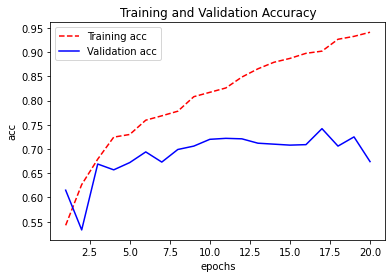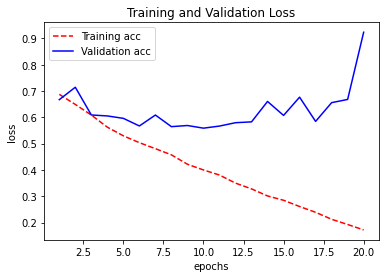

In [26]:
# Crea una miniapp amb un botó que ens permeti escollir una imatge del nostre ordinador,
# mostri aquesta imatge després d'adaptarla i comprobi si es tracta d'un gat o d'un gos.
#
# Després prova amb diferents imatges de gats i gossos obtingudes d'internet o de fotos
# realitzades a la vida real. Si tens mascota és una bona oportunitat per fer proves.

import tensorflow as tf
from PIL import Image
import io
import ipywidgets as widgets
from IPython.display import display
import numpy as np

# Función para procesar y clasificar la imagen
def classify_image(change):
    # Accede a la imagen cargada
    uploaded_file = list(upload_button.value.values())[0]
    image = Image.open(io.BytesIO(uploaded_file['content']))

    # Redimensiona la imagen al tamaño que requiere el modelo (150x150 en este caso)
    image = image.resize((150, 150))

    # Convierte la imagen en un array de numpy y normaliza los valores
    image_array = np.array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)  # Añadir dimensión de batch

    # Realiza la predicción
    predictions = model.predict(image_array)
    prediction_value = predictions[0][0]

    # Interpreta la predicción
    if prediction_value > 0.5:
        label = f"Gos: (probabilidad: {prediction_value:.2%})"
    else:
        label = f"Gat: (probabilidad: {1 - prediction_value:.2%})"

    # Muestra la imagen y la predicción
    display(widgets.Image(value=uploaded_file['content']))
    print(f"Predicción: {label}")

# Crea un botón para cargar la imagen
upload_button = widgets.FileUpload(accept="image/*", multiple=False)
display(upload_button)

# Ejecuta la función cuando se selecciona una imagen
upload_button.observe(classify_image, names='value')

FileUpload(value={}, accept='image/*', description='Upload')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\…

Predicción: Gat: (probabilidad: 100.00%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\…

Predicción: Gos: (probabilidad: 100.00%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\…

Predicción: Gat: (probabilidad: 100.00%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\…

Predicción: Gos: (probabilidad: 100.00%)


#Repte 5v1: Gat o gos amb *Data Augmentation*

Com menys dades d'entrenament tinguem disponibles, menys possibilitats tindrem d'obtenir prediccions precises. Ara crearem un nou model fent servir tècniques de **Data Augmentation**. Aquest mètode ens permet generar més imatges a partir de les imatges disponibles fent transformacions aleatòries que ens generin imatges noves.

Aquestes transformacions poden ser operacions com rotar, invertir, voltear, zoom, etc. Ho farem amb la funció **[ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)** del paquet de preprocessat d'imatges de **Keras**.

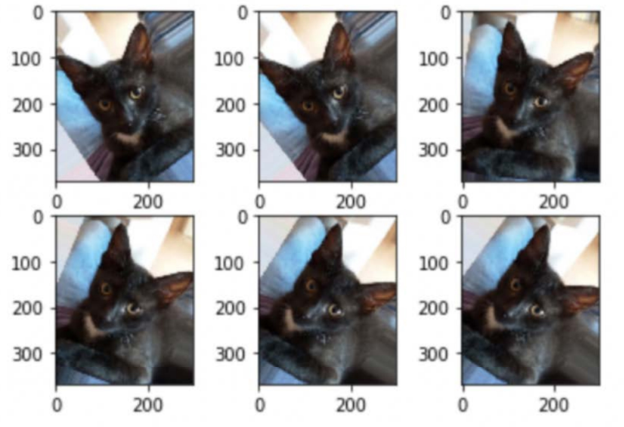

In [11]:
# Exemple d'ús
#
# En aquest cas no tindria sentit invertir verticalment la imatge perquè tindriem
# gats i gossos de cap per avall

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale = 1./255,                     # Normalització dels pixels
    rotation_range = 40,                  # Rotació aleatòria fins a aquest angle
    width_shift_range = 0.2,              # Traslació aleatòria fins al 20% de l'amplada
    height_shift_range = 0.2,             # Traslació aleatòria fins al 20% de l'alçada
    shear_range = 0.2,                     # Transformació aleatòria de tall
    zoom_range = 0.2,                     # Zoom aleatoria fins al 20%
    horizontal_flip = True,               # Efecte mirall horitzontal
    fill_mode = 'nearest'                 # Estrategia per omplir els pixels de nova creació
)

# Genera la variable train_generator
# Generació de dades d'entrenament
train_generator = train_datagen.flow_from_directory(
    train_dir,    # Ruta al directori d'entrenament
    target_size=(150, 150),                           # Mida de les imatges
    batch_size=32,                                    # Mida del lot
    class_mode='binary'                               # Classificació binària
)

# Generació de dades de validació
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,                   # Ruta al directori de validació
    target_size=(150, 150),           # Mida de les imatges
    batch_size=32,                    # Mida del lot
    class_mode='binary'               # Classificació binària
)

# Generació de dades de test
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,                    # Ruta al directori de test
    target_size=(150, 150),           # Mida de les imatges
    batch_size=32,                    # Mida del lot
    class_mode='binary'               # Classificació binària
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
# Crea un nou model amb la mateixa estructura que en el cas anterior i
# realitza l'entrenament de 100 epochs amb les noves dades


# Comprovació dels lots generats
for data_batch, labels_batch in train_generator:
    print(f"Shape de les dades: {data_batch.shape}, Shape de les etiquetes: {labels_batch.shape}")
    break


# Creació del model
model_51 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilació del model
model_51.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenament del model
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size
history = model_51.fit(
    train_generator,
    epochs=100,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    verbose=1
)

Shape de les dades: (32, 150, 150, 3), Shape de les etiquetes: (32,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


62/62 ━━━━━━━━━━━━━━━━━━━━ 24s 272ms/step - accuracy: 0.5039 - loss: 0.7354 - val_accuracy: 0.5161 - val_loss: 0.6769
Epoch 2/100
 1/62 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4062 - loss: 0.7231

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4062 - loss: 0.7231 - val_accuracy: 0.2500 - val_loss: 0.7329
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 216ms/step - accuracy: 0.5395 - loss: 0.6867 - val_accuracy: 0.5000 - val_loss: 0.6802
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - accuracy: 0.5000 - loss: 0.7167 - val_accuracy: 0.6250 - val_loss: 0.7032
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 219ms/step - accuracy: 0.5554 - loss: 0.6739 - val_accuracy: 0.6321 - val_loss: 0.6354
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6250 - loss: 0.6701 - val_accuracy: 0.7500 - val_loss: 0.5953
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 216ms/step - accuracy: 0.5741 - loss: 0.6674 - val_accuracy: 0.5282 - val_loss: 0.6923
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5000 - loss: 0.6890 - val_accuracy: 0.7500 - val_loss: 0.6457
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 215ms/step - accuracy: 0.5530 - loss: 0.6827 - val_accuracy: 0.551

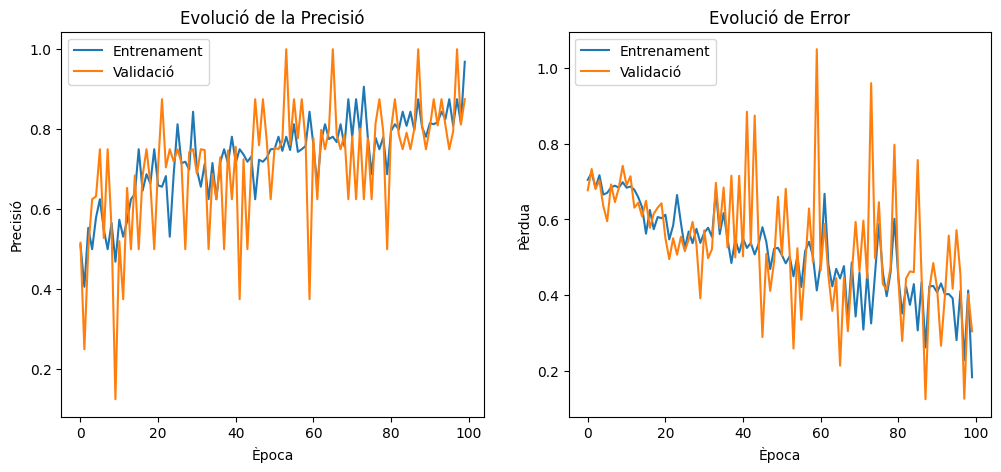

In [13]:
# Mostra el gràfic amb l'evolució de la precisió i l'error de les dades
# d'entrenament i les dades de validació
import matplotlib.pyplot as plt

# Funció per mostrar els gràfics d'entrenament
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Evolució de la precisió
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Entrenament')
    plt.plot(history.history['val_accuracy'], label='Validació')
    plt.title('Evolució de la Precisió')
    plt.xlabel('Època')
    plt.ylabel('Precisió')
    plt.legend()

    # Evolució de l'error
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Entrenament')
    plt.plot(history.history['val_loss'], label='Validació')
    plt.title('Evolució de Error')
    plt.xlabel('Època')
    plt.ylabel('Pèrdua')
    plt.legend()

    plt.show()

# Mostra dels gràfics
plot_training_history(history)



### Pregunta 4
A partir de quin epoch es produeix el sobreentrenament?

 El sobreentrenament podria començar al voltant del epoch 30, on la precisió de validació comença a variar dràsticament i ja no segueix la tendència de la precisió d'entrenament.


In [14]:
# Fes l'avaluació del model amb les dades de test
test_loss, test_accuracy = model_51.evaluate(test_generator, verbose=1)
print(f"Pèrdua en el test: {test_loss:.2}")
print(f"Precisió en el test: {test_accuracy:.2%}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7985 - loss: 0.4597
Pèrdua en el test: 0.47
Precisió en el test: 79.10%


#Repte 5v2: Gat o gos amb *Feature Extraction*

En aquesta versió del model farem servir la tècnica **Transfer Learning** per millorar encara més la precisió del nostre model, en concret l'estratègia **Feature Extraction**. Aprofitarem una xarxa preentrenada anomenada **VGG16** que tenim disponible als paquets de Keras. Aquesta és una CNN entrenada amb 1 milió d'imatges classificades en 1000 classes diferents.

In [15]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU

# Creem un model a partir de VGG16
pre_trained_model = VGG16(input_shape = (150,150,3),
                          include_top = False,
                          weights = 'imagenet'
                          )

# Mostra un resum de l'estructura de la CNN preentrenada
pre_trained_model.summary()

# Congelem les capes per a que no es modifiquin el pesos durant l'entrenament
for layer in pre_trained_model.layers:
  layer.trainable = False

# Podem crear el modelFE com si la CNN preentrenada fos una capa més. Afegirem
# una capa Flatten i una Dense de 256 neurones abans de la capa de sortida
modelFE = Sequential()
modelFE.add(pre_trained_model)

modelFE.add(Flatten())  # Aplanem el resultat del model preentrenat
modelFE.add(Dense(256, activation='relu'))  # Capa densa amb 256 neurones
modelFE.add(Dropout(0.5))  # Dropout per evitar overfitting
modelFE.add(Dense(1, activation='sigmoid'))  # Capa de sortida per classificació binària

# Mostrem el resum del model complet
modelFE.summary()

# Compilem el model
modelFE.compile(optimizer=RMSprop(learning_rate=0.0001),
                loss='binary_crossentropy',
                metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

### Pregunta 5
Per què una part dels paràmetres són no entrenables? A quina part del model corresponen?

Corresponen al model preentrenat. No son entrenables pq hem congelat les capes del model preentrenat. Així aconseguim que no es modifiquin els pesos durant l'entrenament i així conservem el coneixement i la eficència q ja tenia.

In [16]:
# Realitza l'entrenament del nou model amb 100 epochs i learning_rate de 0.0001
train_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_datagen = ImageDataGenerator(rescale=1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              batch_size=20,
                                                              class_mode='binary',
                                                              target_size=(150, 150))
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=100,
                    verbose=1)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.9799 - loss: 0.0779 - val_accuracy: 0.6990 - val_loss: 0.8502
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.9819 - loss: 0.0682 - val_accuracy: 0.7120 - val_loss: 0.9580
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.9862 - loss: 0.0523 - val_accuracy: 0.6980 - val_loss: 0.9021
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9939 - loss: 0.0412 - val_accuracy: 0.7110 - val_loss: 0.9344
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9914 - loss: 0.0380 - val_accuracy: 0.7130 - val_loss: 0.9932
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.9947 - loss: 0.0288 - val_accuracy: 0.7110 - val_loss: 1.1134
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - accuracy: 0.9957 - loss: 0.0225 - val_accuracy: 0.6870 - val_loss: 1.5518
Epoch 

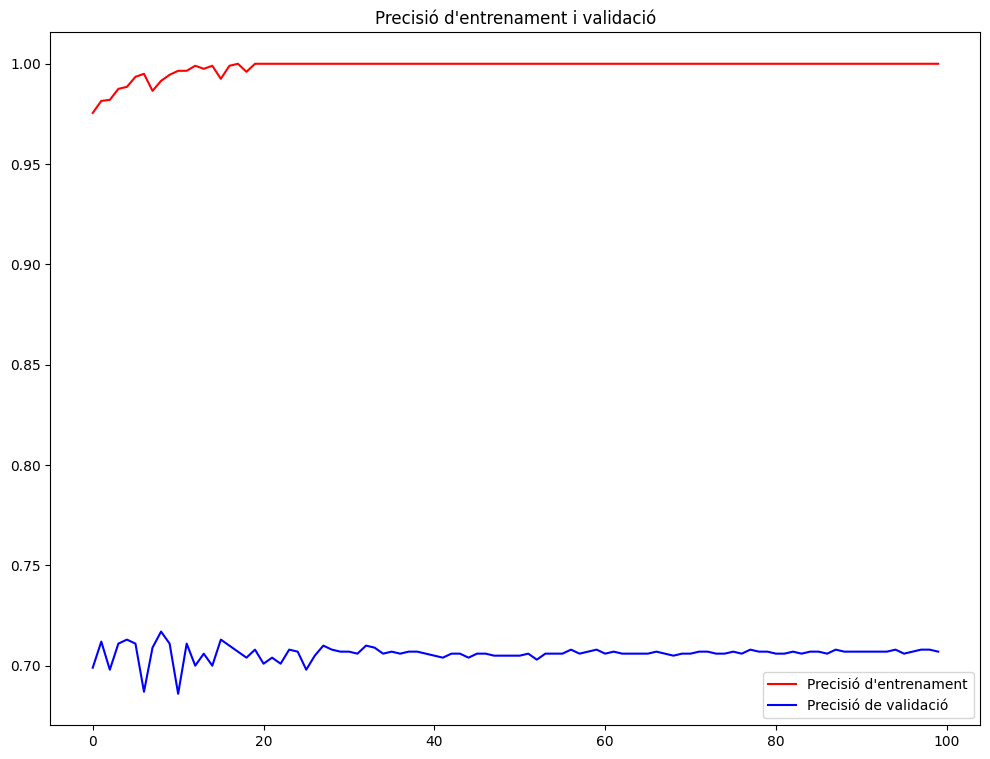

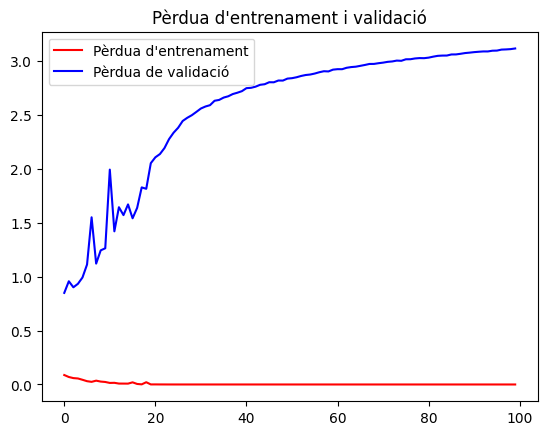

In [17]:
# Mostra el gràfic amb l'evolució de la precisió i l'error de les dades d'entrenament i les dades de validació
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.figure(figsize=(12, 9))
plt.plot(epochs, acc, 'r', label='Precisió d\'entrenament')
plt.plot(epochs, val_acc, 'b', label='Precisió de validació')
plt.title('Precisió d\'entrenament i validació')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Pèrdua d\'entrenament')
plt.plot(epochs, val_loss, 'b', label='Pèrdua de validació')
plt.title('Pèrdua d\'entrenament i validació')
plt.legend()
plt.show()


### Pregunta 6
A partir de quin epoch es produeix el sobreentrenament?

Mes o menys a partir del epoch 20, q es quan la pèrdua d'entrenament continua disminuint mentre que la pèrdua de validació comença a augmentar. A més la precisió d'entrenament millora mentre que la de validació es manté constant.

In [18]:
# Fes l'avaluació del model amb les dades de test
test_datagen = ImageDataGenerator(rescale=1.0/255.)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(150, 150)
)

# Avaluar el model amb les dades de test
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)

# Mostrar els resultats
print(f"Pèrdua en les dades de test: {test_loss}")
print(f"Precisió en les dades de test: {test_accuracy:%}")

Found 1000 images belonging to 2 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7031 - loss: 3.0235
Pèrdua en les dades de test: 2.8485140800476074
Precisió en les dades de test: 71.300000%


#Repte 5v3: Gat o gos amb *Fine-Tuning*

In [19]:
# Crea un nou model a partir del model pre-entrenat VGG16 i entrena'l amb la
# tècnica Fine-Tuning. Has de introduir el valor True el paràmetre layer.trainable
# de totes les capes 'block5'. Pots fer servir layer.name. En total hauries de tenir
# al voltant de 9M de paràmetres entrenables
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
# Carreguem el model pre-entrenat VGG16 sense la part superior
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Activem les capes del bloc 5 per entrenar-les
for layer in base_model.layers:
    if 'block5' in layer.name:
        layer.trainable = True
    else:
        layer.trainable = False

# Afegim les capes superiors personalitzades
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

# Definim el model complet
model = Model(inputs=base_model.input, outputs=outputs)

# Compilació del model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [20]:
# Entrena el model durant 100 epochs
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size
history = model.fit(
    train_generator,
    epochs=100,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    verbose=1
)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 109ms/step - accuracy: 0.7225 - loss: 0.5148 - val_accuracy: 0.9190 - val_loss: 0.1907
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 152us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.9209 - loss: 0.1806 - val_accuracy: 0.9000 - val_loss: 0.2386
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.9474 - loss: 0.1140 - val_accuracy: 0.8230 - val_loss: 0.4511
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 97ms/step - accuracy: 0.9821 - loss: 0.0657 - val_accuracy: 0.9310 - val_loss: 0.1623
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.9937 - loss: 0.0220 

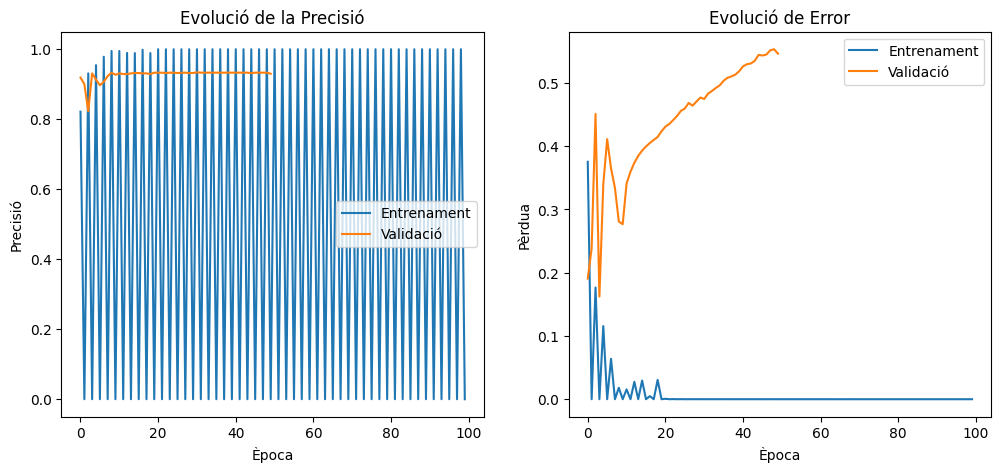

In [21]:
# Mostra el gràfic amb l'evolució de la precisió i l'error de les dades
# d'entrenament i les dades de validació
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Evolució de la precisió
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Entrenament')
    plt.plot(history.history['val_accuracy'], label='Validació')
    plt.title('Evolució de la Precisió')
    plt.xlabel('Època')
    plt.ylabel('Precisió')
    plt.legend()

    # Evolució de l'error
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Entrenament')
    plt.plot(history.history['val_loss'], label='Validació')
    plt.title('Evolució de Error')
    plt.xlabel('Època')
    plt.ylabel('Pèrdua')
    plt.legend()

    plt.show()

# Mostra dels gràfics
plot_training_history(history)

In [22]:
# Fes l'avaluació del model amb les dades de test
test_datagen = ImageDataGenerator(rescale=1.0/255.)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(150, 150)
)

loss, accuracy = model.evaluate(test_generator)
print(f'Pèrdua del model: {loss}')
print(f'Precisió del model: {accuracy}')



Found 1000 images belonging to 2 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.9361 - loss: 0.4474
Pèrdua del model: 0.49973779916763306
Precisió del model: 0.9399999976158142


### Pregunta 7
Quina ha estat la precisió amb cada un dels models?


*   CNN:
*   amb Data Augmentation:
*   amb Feature Extraction:
*   amb Fine-Tuning:



# Com guardem els models creats?

Com hauràs pogut comprovar, els models que estem creant són cada cop més complexes i triguen més en realitzar l'entrenament. És per això que en certes situacions ens interesarà guardar el model per recuperar-lo en un altre moment.

In [24]:
# Guarda en un fitxer el model que millor ha realitzat les prediccions fent servir
# la funció save(). Aquesta funció fa servir el format hdf5.
model.save('gat_y_gos.h5')

# Crea un model nou amb un altre nom i carrega la configuració del model guardat
# al fitxer fent servir la funció load_model()
from keras.models import load_model
load_model = load_model('gat_y_gos.h5')

# Desar el model en format HDF5
load_model.save('load_model.h5')

# Crear un nou model i carregar-hi la configuració desada


In [27]:
# Crea una miniapp com l'anterior però amb el model final que acabes de recuperar
import tensorflow as tf
from PIL import Image
import io
import ipywidgets as widgets
from IPython.display import display
import numpy as np

# Función para procesar y clasificar la imagen
def classify_image(change):
    # Accede a la imagen cargada
    uploaded_file = list(upload_button.value.values())[0]
    image = Image.open(io.BytesIO(uploaded_file['content']))

    # Redimensiona la imagen al tamaño que requiere el modelo (150x150 en este caso)
    image = image.resize((150, 150))

    # Convierte la imagen en un array de numpy y normaliza los valores
    image_array = np.array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)  # Añadir dimensión de batch

    # Realiza la predicción
    predictions = load_model.predict(image_array)
    prediction_value = predictions[0][0]

    # Interpreta la predicción
    if prediction_value > 0.5:
        label = f"Gos: (probabilidad: {prediction_value:.2%})"
    else:
        label = f"Gat: (probabilidad: {1 - prediction_value:.2%})"

    # Muestra la imagen y la predicción
    display(widgets.Image(value=uploaded_file['content']))
    print(f"Predicción: {label}")

# Crea un botón para cargar la imagen
upload_button = widgets.FileUpload(accept="image/*", multiple=False)
display(upload_button)

# Ejecuta la función cuando se selecciona una imagen
upload_button.observe(classify_image, names='value')


FileUpload(value={}, accept='image/*', description='Upload')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\…

Predicción: Gos: (probabilidad: 100.00%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\…

Predicción: Gat: (probabilidad: 100.00%)
